In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from main import PennFudanDataset, get_transform
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
ds = PennFudanDataset('/media/jaidevd/motherbox/archive/pennfudan/PennFudanPed/', None, get_transform(train=False))
df = []
for image, ann in ds:
    masks = ann['masks'].numpy()
    n_ped, h, w = masks.shape
    fc = np.mean(masks.sum(-1).sum(-1) / (h * w))
    df.append({'id': ann['image_id'].item(), 'X': n_ped, 'Y': fc})
df = pd.DataFrame.from_records(df)
df.head()

,id,X,Y
0,0,2,0.048331
1,1,1,0.072687
2,2,1,0.070123
3,3,2,0.054484
4,4,2,0.063945


In [11]:
df['X'].value_counts()

1    58
2    40
3    35
4    17
5    12
6     5
7     2
8     1
Name: X, dtype: int64

In [ ]:
from scipy import stats
from sklearn.model_selection import train_test_split

In [12]:
df['xbin'] = df['X'].copy()
df.loc[df['xbin'] == 8, 'xbin'] = 7
xtrain, xtest = train_test_split(df['X'], stratify=df['xbin'])

In [ ]:
df['ybin'] = pd.cut()

<AxesSubplot:>

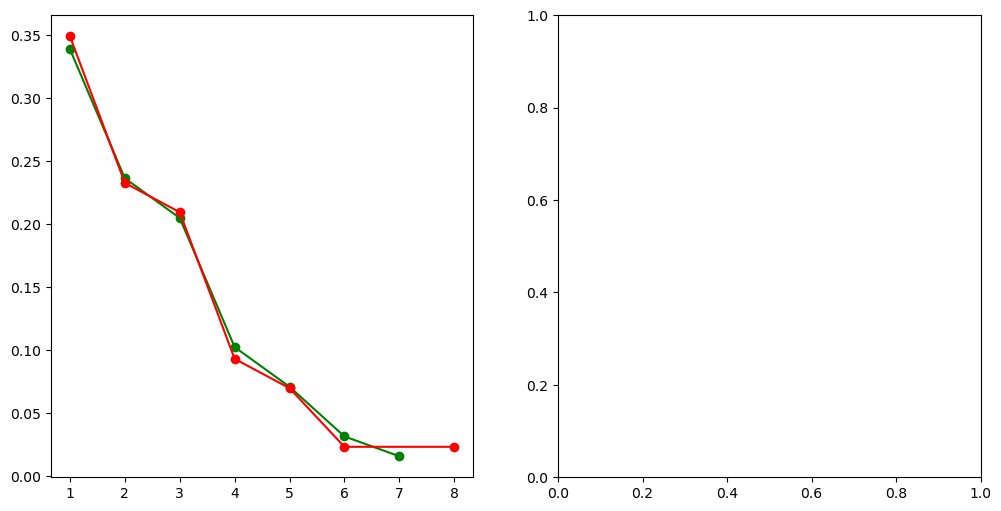

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
nobj_ax, size_ax = ax

xtrain.value_counts(normalize=True).sort_index().plot(ax=nobj_ax, marker='o', color='g', label='Train')
xtest.value_counts(normalize=True).sort_index().plot(ax=nobj_ax, marker='o', color='r', label='Test')
nobj_ax.set_xlabel('# of pedestrians per image')
nobj_ax.set_ylabel('Probability')

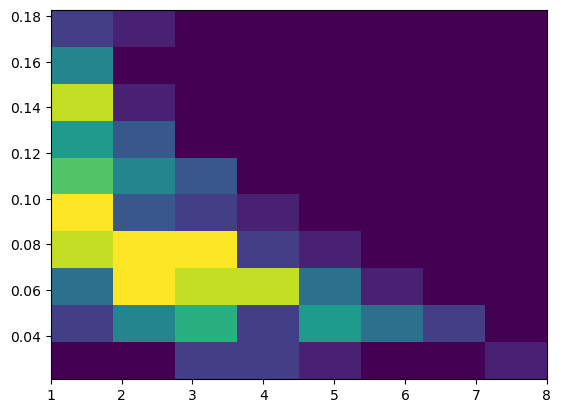

In [30]:
H, xx, yy, _ = plt.hist2d(df['X'], df['Y'], bins=[8, 10])
ax = plt.gca()
xticks, yticks = ax.get_xticks(), ax.get_yticks()

<AxesSubplot:>

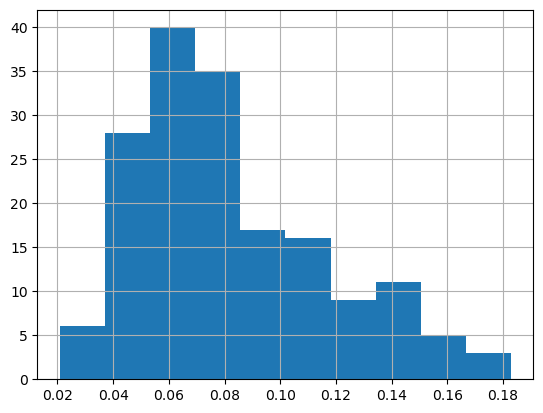

In [80]:
df['Y'].hist()

Text(50.722222222222214, 0.5, 'Area of masks (%)')

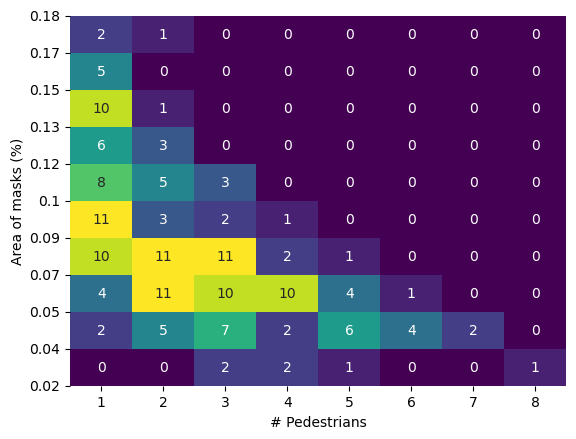

In [79]:
H, xx, yy, _ = plt.hist2d(df['X'], df['Y'], bins=[8, 10])
ax = plt.gca()
xticks, yticks = ax.get_xticks(), ax.get_yticks()

hax = sns.heatmap(H.T[::-1], annot=True, cmap=plt.cm.viridis, cbar=False, ax=ax, xticklabels=xticks.astype(int))
_ = plt.yticks(np.arange(11), yy[::-1].round(2), rotation='horizontal')
plt.xlabel('# Pedestrians')
plt.ylabel('Area of masks (%)')

In [67]:
len(yy)

11

In [60]:
ax.get_ybound()

(0.0, 10.0)

In [61]:
hax.get_ybound()

(0.0, 10.0)

In [62]:
hax.get_y

AttributeError: 'AxesSubplot' object has no attribute 'get_ymargin'

<AxesSubplot:>

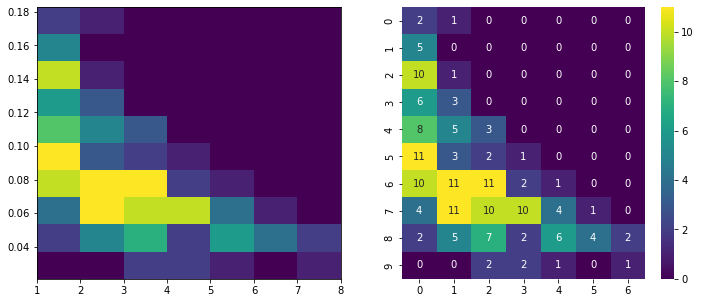

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

H, xx, yy, _ = ax[0].hist2d(df['X'], df['Y'], bins=[7, 10])
sns.heatmap(H.T[::-1], cmap=plt.cm.viridis, annot=True)

In [100]:
yy

array([0.02091332, 0.03710764, 0.05330196, 0.06949628, 0.0856906 ,
       0.10188492, 0.11807924, 0.13427356, 0.15046789, 0.16666221,
       0.18285653])

In [81]:
edges = np.round(np.arange(0.02, 0.22, 0.02), 2)
df['ylabel'] = pd.cut(df['Y'], bins=10, labels=edges)

In [85]:
df.head()

,id,X,Y,xbin,ylabel
0,0,2,0.048331,2,0.04
1,1,1,0.072687,1,0.08
2,2,1,0.070123,1,0.08
3,3,2,0.054484,2,0.06
4,4,2,0.063945,2,0.06


In [82]:
bins = df[['X', 'ylabel']].drop_duplicates()

In [91]:
bins.set_index(['X', 'ylabel'], inplace=True, verify_integrity=True)

In [83]:
import string

bins['label'] = np.arange(bins.shape[0])

In [88]:
df

,id,X,Y,xbin,ylabel
0,0,2,0.048331,2,0.04
1,1,1,0.072687,1,0.08
2,2,1,0.070123,1,0.08
3,3,2,0.054484,2,0.06
4,4,2,0.063945,2,0.06
...,...,...,...,...,...
165,165,2,0.077979,2,0.08
166,166,1,0.150715,1,0.18
167,167,1,0.107905,1,0.12
168,168,2,0.079792,2,0.08


In [92]:
df['bin_id'] = df.apply(lambda x: bins.loc[(x['X'], x['ylabel'])], axis=1)

In [93]:
df.head()

,id,X,Y,xbin,ylabel,bin_id
0,0,2,0.048331,2,0.04,0
1,1,1,0.072687,1,0.08,1
2,2,1,0.070123,1,0.08,1
3,3,2,0.054484,2,0.06,2
4,4,2,0.063945,2,0.06,2


In [94]:
df['ylabel'].value_counts()

0.06    40
0.08    35
0.04    28
0.1     17
0.12    16
0.16    11
0.14     9
0.02     6
0.18     5
0.2      3
Name: ylabel, dtype: int64

In [95]:
(df['bin_id'].value_counts() == 1).sum()

7

In [96]:
df.head()

,id,X,Y,xbin,ylabel,bin_id
0,0,2,0.048331,2,0.04,0
1,1,1,0.072687,1,0.08,1
2,2,1,0.070123,1,0.08,1
3,3,2,0.054484,2,0.06,2
4,4,2,0.063945,2,0.06,2


In [99]:
vc = df['bin_id'].value_counts()
single_bin = vc[vc == 1]

xdf = df[~df['bin_id'].isin(single_bin.index)]
train, test = train_test_split(xdf, stratify=xdf['bin_id'], train_size=85)
test = pd.concat((test, df[df['bin_id'].isin(single_bin.index)]))

Text(0.5, 0.98, 'RV estimates after stratification')

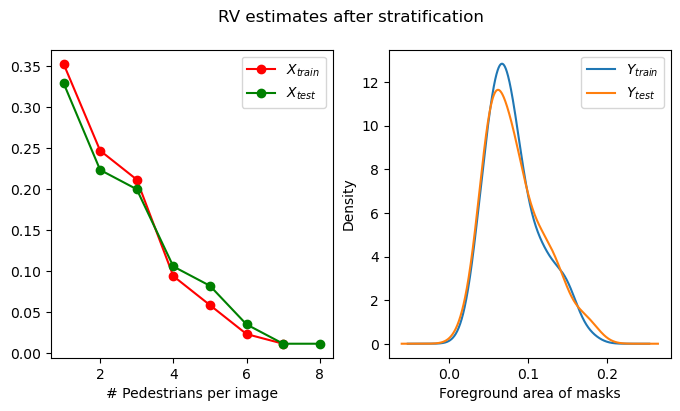

In [111]:
x_c_train = train['X'].value_counts(normalize=True).sort_index()
x_c_test = test['X'].value_counts(normalize=True).sort_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].plot(x_c_train.index, x_c_train.values, '-ro', label='$X_{train}$')
ax[0].plot(x_c_test.index, x_c_test.values, '-go', label='$X_{test}$')
ax[0].legend()

train['Y'].plot(kind='kde', ax=ax[1], label='$Y_{train}$')
test['Y'].plot(kind='kde', ax=ax[1], label='$Y_{test}$')
ax[1].legend()

ax[0].set_xlabel('# Pedestrians per image')
ax[1].set_xlabel('Foreground area of masks')

plt.suptitle('RV estimates after stratification')

In [110]:
x_c_train

1    0.352941
2    0.247059
3    0.211765
4    0.094118
5    0.058824
6    0.023529
7    0.011765
Name: X, dtype: float64